## The LLMs
The fundamental component of LangChain involves invoking an LLM with a specific input. To illustrate this, we'll explore a simple example. Let's imagine we are building a service that suggests personalized workout routines based on an individual's fitness goals and preferences.

To accomplish this, we will first need to import the LLM wrapper.

In [3]:
from langchain.llms import OpenAI

The temperature parameter in OpenAI models manages the randomness of the output. When set to 0, the output is mostly predetermined and suitable for tasks requiring stability and the most probable result. At a setting of 1.0, the output can be inconsistent and interesting but isn't generally advised for most tasks. For creative tasks, a temperature between 0.70 and 0.90 offers a balance of reliability and creativity. The best setting should be determined by experimenting with different values for each specific use case. The code initializes the GPT-3.5 model’s Turbo variant. We will learn more about the various models and their differences later on.

Notes:
Adding the environment variables

https://platform.openai.com/docs/quickstart#:~:text=Right%2Dclick%20on%20'This%20PC,key%20as%20the%20variable%20value.

https://www.immersivelimit.com/tutorials/adding-your-openai-api-key-to-system-environment-variables

Setting up example:
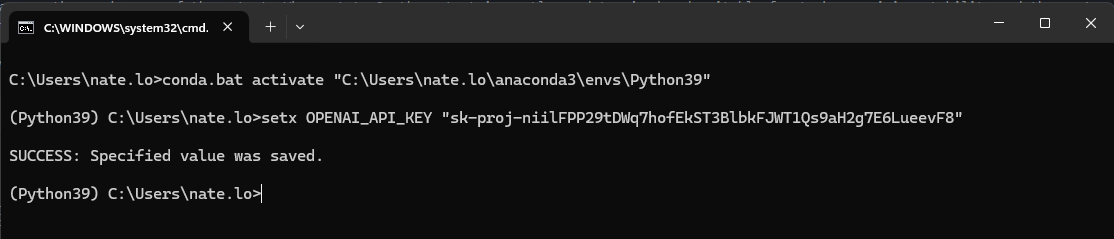

In [4]:


# Before executing the following code, make sure to have
# your OpenAI key saved in the “OPENAI_API_KEY” environment variable.
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.9)

Now we can call it on some input!

In [5]:
text = "Suggest a personalized workout routine for someone looking to improve cardiovascular endurance and prefers outdoor activities."
print(llm(text))

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors..
Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors..


KeyboardInterrupt: 

This code will generate a personalized workout routine based on the user's fitness goals and preferences using the LLM model:

1) Monday: Jog for 30 minutes outside 
2) Tuesday: 30 minutes of jumping jacks 
3) Wednesday: 30 minutes of running stairs 
4) Thursday: 30 minutes of sprints 
5) Friday: 30 minutes of jogging on an inclined treadmill 
6) Saturday: 30 minutes of interval training 
7) Sunday: Walk for 30 minutes

### The Chains

In LangChain, a chain is an end-to-end wrapper around multiple individual components, providing a way to accomplish a common use case by combining these components in a specific sequence. The most commonly used type of chain is the LLMChain, which consists of a PromptTemplate, a model (either an LLM or a ChatModel), and an optional output parser.


The LLMChain works as follows:


Takes (multiple) input variables.
Uses the PromptTemplate to format the input variables into a prompt.
Passes the formatted prompt to the model (LLM or ChatModel).
If an output parser is provided, it uses the OutputParser to parse the output of the LLM into a final format.
In the next example, we demonstrate how to create a chain that generates a possible name for a company that produces eco-friendly water bottles. By using LangChain's LLMChain, PromptTemplate, and OpenAIclasses, we can easily define our prompt, set the input variables, and generate creative outputs. 

The sample code:

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain

llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0.9)
prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain only specifying the input variable.
print(chain.run("eco-friendly water bottles"))

The output:

Eco-Pure Water Bottles.

### The Memory

In LangChain, Memory refers to the mechanism that stores and manages the conversation history between a user and the AI. It helps maintain context and coherency throughout the interaction, enabling the AI to generate more relevant and accurate responses. Memory, such as ConversationBufferMemory, acts as a wrapper around ChatMessageHistory, extracting the messages and providing them to the chain for better context-aware generation.

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)
conversation = ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferMemory()
)

# Start the conversation
conversation.predict(input="Tell me about yourself.")

# Continue the conversation
conversation.predict(input="What can you do?")
conversation.predict(input="How can you help me with data analysis?")

# Display the conversation
print(conversation)

The output you will observe resembles the following, although the specifics may be different.

**> Entering new ConversationChain chain...**

Prompt after formatting:

***The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Tell me about yourself.
AI:  Hi there! I'm an AI created to help people with their daily tasks. I'm programmed to understand natural language and respond to questions and commands. I'm also able to learn from my interactions with people, so I'm constantly growing and improving. I'm excited to help you out!
Human: What can you do?
AI:  I can help you with a variety of tasks, such as scheduling appointments, setting reminders, and providing information. I'm also able to answer questions about topics like current events, sports, and entertainment. I'm always learning new things, so I'm sure I can help you with whatever you need.
Human: How can you help me with data analysis?
AI:*  I'm not familiar with data analysis, but I'm sure I can help you find the information you need. I can search the web for articles and resources related to data analysis, and I can also provide you with links to helpful websites.**

**> Finished chain.**

In this output, you can see the memory being used by observing the "Current conversation" section. After each input from the user, the conversation is updated with both the user's input and the AI's response. This way, the memory maintains a record of the entire conversation. When the AI generates its next response, it will use this conversation history as context, making its responses more coherent and relevant.


### Deep Lake VectorStore

Deep Lake provides storage for embeddings and their corresponding metadata in the context of LLM apps. It enables hybrid searches on these embeddings and their attributes for efficient data retrieval. It also integrates with LangChain, facilitating the development and deployment of applications.


Deep Lake provides several advantages over the typical vector store:


- It’s multimodal, which means that it can be used to store items of diverse modalities, such as texts, images, audio, and video, along with their vector representations. 
- It’s serverless, which means that we can create and manage cloud datasets without creating and managing a database instance. This aspect gives a great speedup to new projects.
- Last, it’s possible to easily create a data loader out of the data loaded into a Deep Lake dataset. It is convenient for fine-tuning machine learning models using common frameworks like PyTorch and TensorFlow.


In order to use Deep Lake, you first have to register on the Activeloop website and redeem your API token. Here are the steps for doing it:


1. Sign up for an account on Activeloop's platform. You can sign up at Activeloop's website. After specifying your username, click on the “Sign up” button. You should now see your homepage.
2. You should now see a “Create API token” button at the top of your homepage. Click on it, and you’ll get redirected to the “API tokens” page. This is where you can generate, manage, and revoke your API keys for accessing Deep Lake.
3. Click on the "Create API token" button. Then, you should see a popup asking for a token name and an expiration date. By default, the token expiration date is set so that the token expires after one day from its creation, but you can set it further in the future if you want to keep using the same token for the whole duration of the course. Once you’ve set the token name and its expiration date, click on the “Create API token” button.
4. You should now see a green banner saying that the token has been successfully generated, along with your new API token, on the “API tokens” page. To copy your token to your clipboard, click on the square icon on its right.
Now that you have your API token, you can conveniently store under the ACTIVELOOP_TOKEN key in the environment variable to retrieve it automatically by the Deep Lake libraries whenever needed. You can also save the token to its environment variable with Python, like in the following code snippet.

```
import os
os.environ["ACTIVELOOP_TOKEN"] = "<YOUR-ACTIVELOOP-TOKEN>"
```